In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def ACFAR2(phi_1, phi_2, n_lags):
    p_m_2 = 1
    p_m_1 = -phi_1/(1+phi_2)
    ACF = [p_m_2, p_m_1]

    for i in range(n_lags):
        p_k = -phi_1*p_m_1 - phi_2*p_m_2
        ACF.append(p_k)

        p_m_2 = p_m_1
        p_m_1 = p_k
    
    return ACF

lag_30 = ACFAR2(-0.7, -0.2, 30)

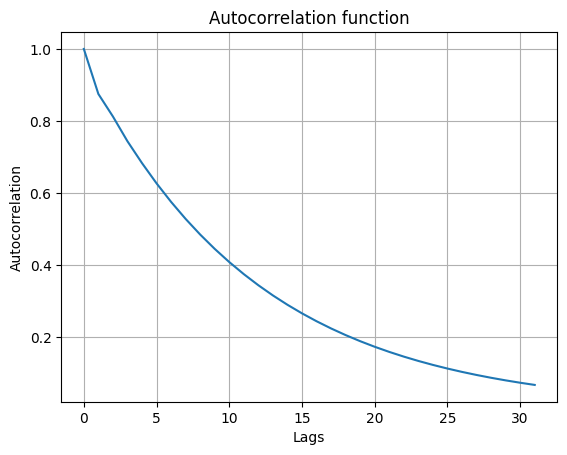

In [16]:
plt.plot(lag_30)
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.grid()
plt.title("Autocorrelation function")

plt.show()

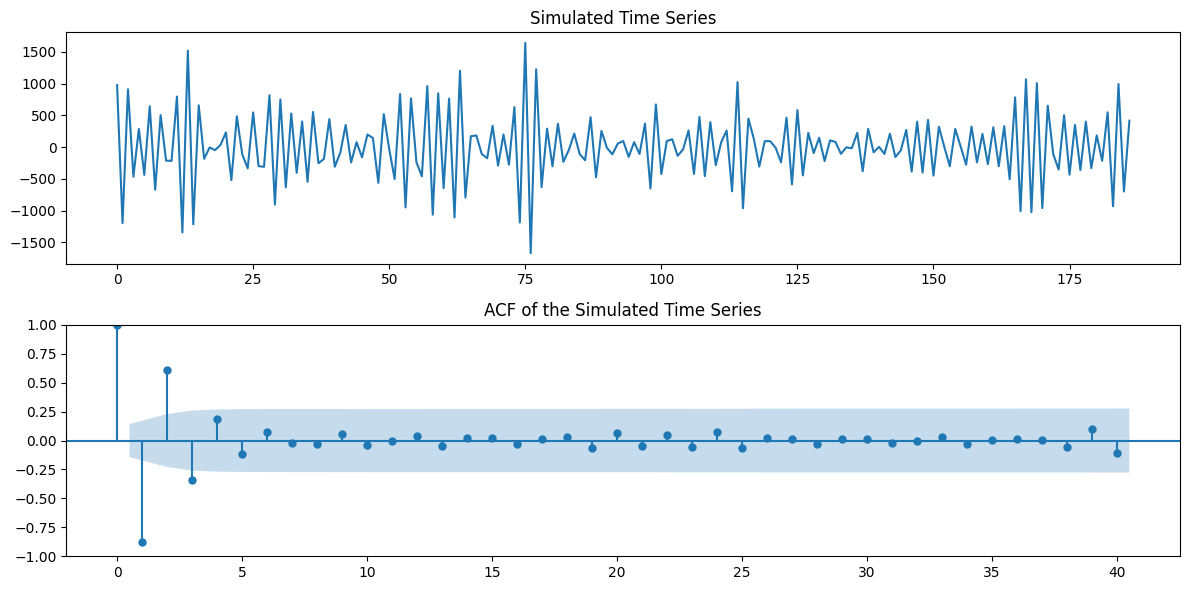

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Define ARMA coefficients for non-seasonal and seasonal components
# Define AR and MA orders and coefficients
p, q = 1, 0  # Non-seasonal AR and MA order
P, Q = 1, 1  # Seasonal AR and MA order
s = 12  # Seasonal period (e.g., monthly data with yearly seasonality)

# Define AR and MA coefficients for the process
phi = np.array([1, -0.5])  # AR(1) coefficient (example)
theta = np.array([1, 0.4])  # MA(1) coefficient (example)

# Seasonal AR and MA coefficients
Phi = np.array([1, -0.4])  # Seasonal AR(1) coefficient
Theta = np.array([1, 0.3])  # Seasonal MA(1) coefficient

# White noise process (epsilon_t)
np.random.seed(42)
n = 200  # Length of the series
epsilon = np.random.normal(0, 1, n)

# Define the ARMA process with seasonal components
# AR and MA process for non-seasonal and seasonal parts
ar = np.concatenate(([1], -phi))  # AR coefficients for the process
ma = np.concatenate(([1], theta))  # MA coefficients for the process
seasonal_ar = np.concatenate(([1], -Phi))  # Seasonal AR coefficients
seasonal_ma = np.concatenate(([1], Theta))  # Seasonal MA coefficients

# ARMA process simulation using the ARMA process function
# We need to generate the time series with seasonal differencing
arima_process = ArmaProcess(ar, ma)

# Generate the series
Y = arima_process.generate_sample(nsample=n)

# Apply seasonal differencing manually (1st order differencing, both seasonal and non-seasonal)
Y_diff = np.diff(Y, n=1)
Y_seasonal_diff = np.diff(Y_diff, n=s)

# Plot the simulated time series
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(Y_seasonal_diff)
plt.title('Simulated Time Series')

# Plot ACF and PACF
plt.subplot(2, 1, 2)
plot_acf(Y_seasonal_diff, lags=40, ax=plt.gca())
plt.title('ACF of the Simulated Time Series')

plt.tight_layout()
plt.show()


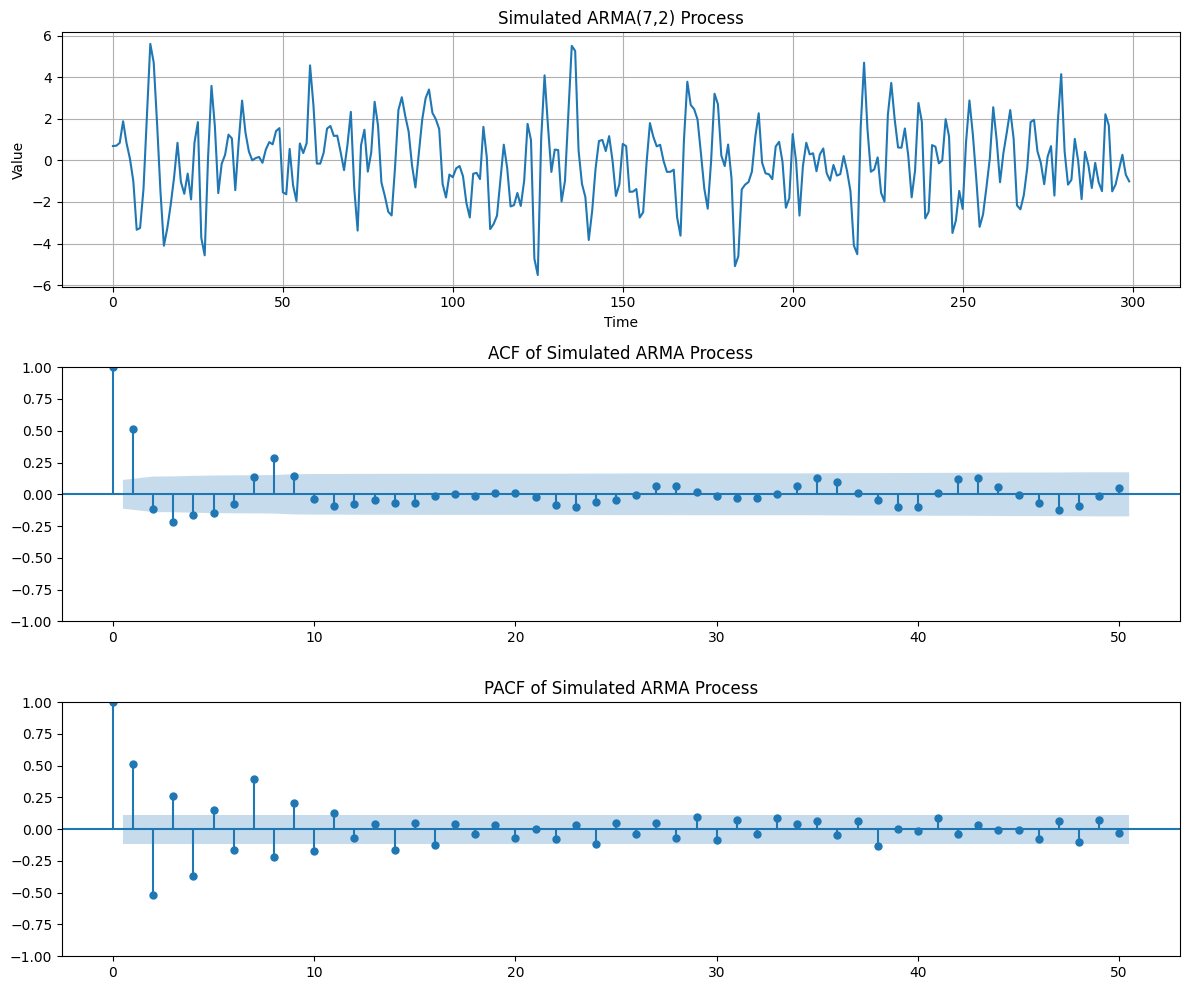

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def simulate_multiplicative_seasonal_model(phi=0, theta=0, Phi=0, Theta=0, 
                                           p=0, d=0, q=0, P=0, D=0, Q=0, s=12, n=200):
    """
    Simulates a SARIMA(p,d,q) × (P,D,Q)[s] process.
    
    Parameters:
    - phi: Non-seasonal AR coefficient (float or list)
    - theta: Non-seasonal MA coefficient (float or list)
    - Phi: Seasonal AR coefficient (float or list)
    - Theta: Seasonal MA coefficient (float or list)
    - p, d, q: Non-seasonal AR, differencing, MA orders
    - P, D, Q: Seasonal AR, differencing, MA orders
    - s: Seasonality period (e.g., 12 for monthly data)
    - n: Number of samples to generate
    
    Returns:
    - Simulated time series (numpy array)
    """

    # Convert scalar parameters to lists if necessary
    phi = np.atleast_1d(phi) if p > 0 else []
    theta = np.atleast_1d(theta) if q > 0 else []
    Phi = np.atleast_1d(Phi) if P > 0 else []
    Theta = np.atleast_1d(Theta) if Q > 0 else []
    
    # Define AR and MA polynomials
    ar = np.r_[1, -np.array(phi)] if p > 0 else np.array([1])
    ma = np.r_[1, np.array(theta)] if q > 0 else np.array([1])
    
    # Define seasonal AR and MA polynomials
    seasonal_ar = np.r_[1] if P == 0 else np.r_[1, np.zeros(s-1), -np.array(Phi)]
    seasonal_ma = np.r_[1] if Q == 0 else np.r_[1, np.zeros(s-1), np.array(Theta)]
    
    # Expand full AR and MA polynomials
    full_ar = np.convolve(ar, seasonal_ar)
    full_ma = np.convolve(ma, seasonal_ma)
    
    # Simulate the process using ArmaProcess
    arma_process = ArmaProcess(full_ar, full_ma)
    y = arma_process.generate_sample(nsample=n)

    # Apply seasonal differencing if needed
    if D > 0:
        for _ in range(D):
            y = np.diff(y, n=s)  # Seasonal differencing of order D

    return y

# Set AR and MA orders and their coefficients
p = 7  # AR order
q = 2  # MA order
ar_coeffs = [0.7, -0.6, 0.5, -0.4, 0.3, -0.25, 0.2, 0.1]  # AR coefficients for AR(2)
ma_coeffs = [0.8, -0.2]  # MA coefficients for MA(2)

# Simulate the ARMA process
simulated_time_series = simulate_arma(p, q, ar_coeffs, ma_coeffs)

# Plot the results
plt.figure(figsize=(12, 10))

# Plot the simulated time series
plt.subplot(3, 1, 1)
plt.plot(simulated_time_series)
plt.title(f"Simulated ARMA({p},{q}) Process")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)

# Plot the ACF
plt.subplot(3, 1, 2)
plot_acf(simulated_time_series, lags=50, ax=plt.gca())
plt.title("ACF of Simulated ARMA Process")

# Plot the PACF
plt.subplot(3, 1, 3)
plot_pacf(simulated_time_series, lags=50, ax=plt.gca())
plt.title("PACF of Simulated ARMA Process")

# Show all plots
plt.tight_layout()
plt.show()


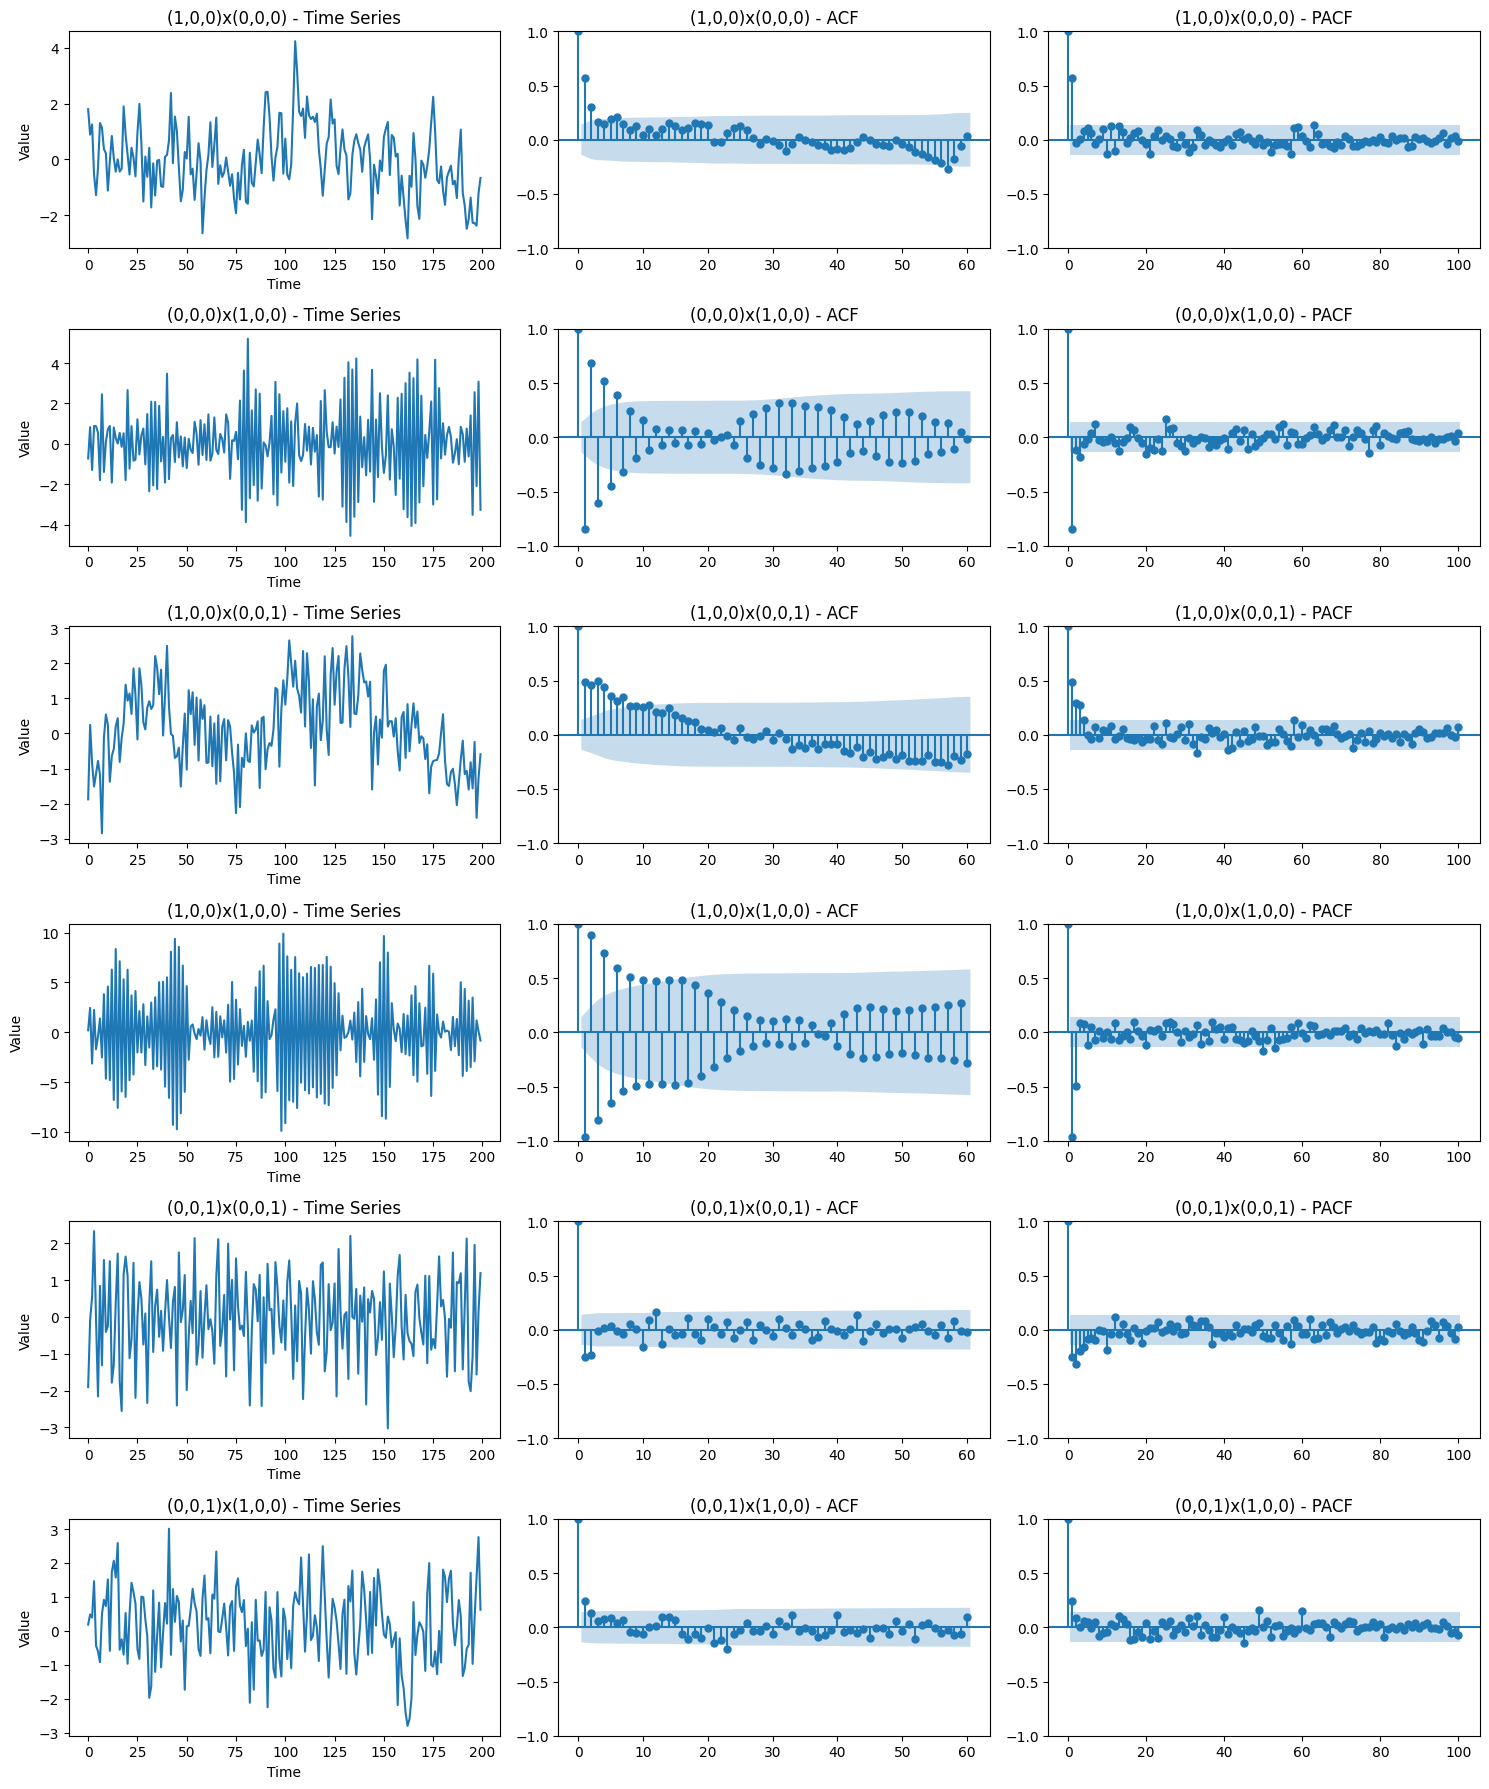

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Function to simulate the given multiplicative seasonal ARMA models
def simulate_multiplicative_seasonal_model(phi, theta, Phi, Theta, p, d, q, P, D, Q, s, n=200):
    # Define the AR and MA polynomials
    # AR part: φ(B), MA part: θ(B)
    ar = np.array([1] + [-phi])  # AR polynomial φ(B)
    ma = np.array([1] + [theta])  # MA polynomial θ(B)
    
    # Seasonal AR part: Φ(B^s), Seasonal MA part: Θ(B^s)
    seasonal_ar = np.array([1] + [-Phi])  # Seasonal AR polynomial Φ(B^s)
    seasonal_ma = np.array([1] + [Theta])  # Seasonal MA polynomial Θ(B^s)

    # Seasonal differencing (B^s - 1) for D
    seasonal_diff = np.array([1] + [0] * (s-1) + [-1])  # (B^s - 1) for seasonal differencing

    # Construct the full ARMA model (p,d,q) x (P,D,Q)
    ar_polynomial = np.convolve(ar, seasonal_ar)  # Combine AR terms
    ma_polynomial = np.convolve(ma, seasonal_ma)  # Combine MA terms
    
    # Seasonal differencing for both seasonal AR and MA parts
    seasonal_ar_diff = np.convolve(ar_polynomial, seasonal_diff)
    seasonal_ma_diff = np.convolve(ma_polynomial, seasonal_diff)
    
    # Create the full model with seasonal differencing
    full_ar_polynomial = np.array([1] + list(seasonal_ar_diff[1:]))
    full_ma_polynomial = np.array([1] + list(seasonal_ma_diff[1:]))
    
    # Simulate the process using ArmaProcess
    arma_process = ArmaProcess(full_ar_polynomial, full_ma_polynomial)
    
    # Generate the time series data
    y = arma_process.generate_sample(nsample=n)
    
    return y

# Define model parameters
models = [
    {"params": {"phi": 0.6, "theta": 0, "Phi": 0, "Theta": 0}, "p": 1, "d": 0, "q": 0, "P": 0, "D": 0, "Q": 0, "s": 12, "title": "(1,0,0)x(0,0,0)"},
    {"params": {"phi": 0, "theta": 0, "Phi": -0.9, "Theta": 0}, "p": 0, "d": 0, "q": 0, "P": 1, "D": 0, "Q": 0, "s": 12, "title": "(0,0,0)x(1,0,0)"},
    {"params": {"phi": 0.9, "theta": -0.7, "Phi": 0, "Theta": 0}, "p": 1, "d": 0, "q": 0, "P": 0, "D": 1, "Q": 0, "s": 12, "title": "(1,0,0)x(0,0,1)"},
    {"params": {"phi": -0.6, "theta": 0, "Phi": -0.8, "Theta": 0}, "p": 1, "d": 0, "q": 0, "P": 1, "D": 0, "Q": 0, "s": 12, "title": "(1,0,0)x(1,0,0)"},
    {"params": {"phi": 0, "theta": 0.4, "Phi": 0, "Theta": -0.8}, "p": 0, "d": 0, "q": 1, "P": 0, "D": 0, "Q": 1, "s": 12, "title": "(0,0,1)x(0,0,1)"},
    {"params": {"phi": 0, "theta": -0.4, "Phi": 0.7, "Theta": 0}, "p": 0, "d": 0, "q": 1, "P": 1, "D": 0, "Q": 0, "s": 12, "title": "(0,0,1)x(1,0,0)"}
]

# Simulate and plot each model with ACF and PACF
plt.figure(figsize=(15, 18))
for i, model in enumerate(models):
    # Simulate the time series
    y = simulate_multiplicative_seasonal_model(
        model["params"]["phi"], model["params"]["theta"],
        model["params"]["Phi"], model["params"]["Theta"],
        model["p"], model["d"], model["q"], model["P"], model["D"], model["Q"], model["s"]
    )
    
    # Plot the time series
    plt.subplot(6, 3, 3*i+1)
    plt.plot(y)
    plt.title(f'{model["title"]} - Time Series')
    plt.xlabel('Time')
    plt.ylabel('Value')
    
    # Plot the ACF
    plt.subplot(6, 3, 3*i+2)
    plot_acf(y, lags=12*5, ax=plt.gca(), title=f'{model["title"]} - ACF')
    
    # Plot the PACF
    plt.subplot(6, 3, 3*i+3)
    plot_pacf(y, lags=100, ax=plt.gca(), title=f'{model["title"]} - PACF')

plt.tight_layout()
plt.show()
